training is:                id             date     price  bedrooms  bathrooms  \
10695  8137500400  20141007T000000  545000.0         3       2.50   
7799   2883201055  20140910T000000  875000.0         4       1.00   
11672  1326059185  20150320T000000  752875.0         4       2.50   
21432  7104100110  20150511T000000  899000.0         4       3.50   
16661  9543000896  20140825T000000  237000.0         3       1.50   
...           ...              ...       ...       ...        ...   
21499  6891100090  20141014T000000  850000.0         5       3.50   
415    3426059070  20140909T000000  570000.0         3       1.75   
3709   5423030300  20140519T000000  525000.0         4       1.75   
9311   1502400300  20140916T000000  235000.0         3       1.75   
5872   6071300500  20140815T000000  550000.0         4       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
10695         2140     40173     2.0           0     0  ...      8   
7799          1670

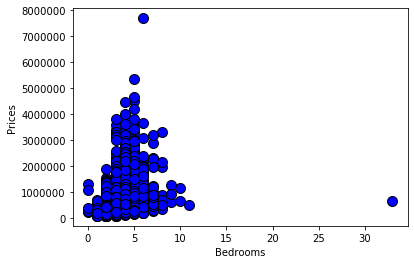

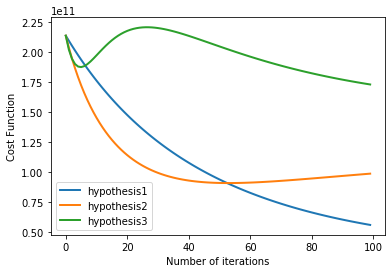

training is:                id             date     price  bedrooms  bathrooms  \
14933  6370000005  20140827T000000  495500.0         3       1.75   
6785   3276930420  20140912T000000  585000.0         4       2.50   
8509   6388910730  20140806T000000  555000.0         3       2.50   
4870   3421059049  20140610T000000  475000.0         2       1.75   
13392  7137800085  20141003T000000  185000.0         3       1.75   
...           ...              ...       ...       ...        ...   
11698  4154300505  20141024T000000  315000.0         2       1.00   
5569   6338000014  20141013T000000  625000.0         4       2.00   
17070   766900250  20150402T000000  406000.0         3       1.75   
16763  8682300010  20150206T000000  829000.0         3       2.75   
17835  9406510040  20150206T000000  555000.0         4       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
14933         2130      6360     1.0           0     0  ...      7   
6785          2330

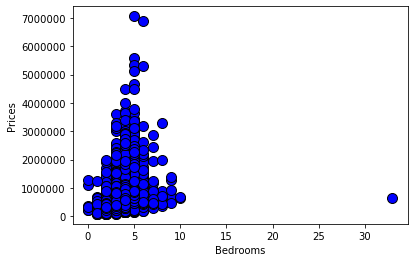

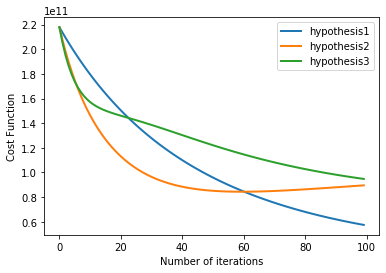

training is:                id             date      price  bedrooms  bathrooms  \
14827  2423029009  20140617T000000   465000.0         2       2.00   
14658  5104220120  20150107T000000   320000.0         4       1.75   
719    4233400400  20150414T000000   267000.0         3       2.00   
9866   5398600075  20140825T000000   523500.0         2       2.00   
2830   7974200820  20140821T000000   865000.0         5       3.00   
...           ...              ...        ...       ...        ...   
19518  3905120610  20140625T000000   578000.0         4       2.50   
7593   2207200405  20140716T000000   460000.0         5       2.00   
9519   3401700150  20150423T000000  1350000.0         5       3.00   
7670   8682290410  20150417T000000   694000.0         2       2.50   
10730  7390400069  20150327T000000   450000.0         2       2.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
14827         1494     19271     2.0           1     4  ...      7   
14658 

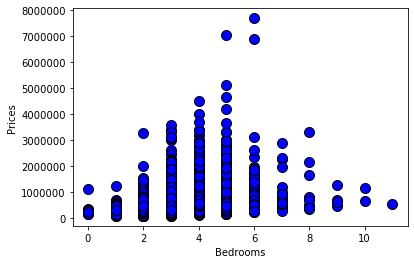

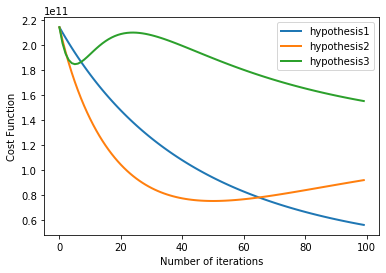

In [1]:
import os
import numpy as np
from matplotlib import pyplot
import pandas as pd
from sklearn.model_selection import KFold

completeData = pd.read_csv('D:/house_data_complete.csv').dropna()
for i in range (3):
 training, cross_validation, testing = np.split(completeData.sample(frac=1), [int(.6*len(completeData)),int(.8*len(completeData))])
 print('training is: %s' %training)
 print('CrossValidation is: %s' % cross_validation)
 print('Testing is: %s' % testing)

 pyplot.plot(training.values[:,3], training.values[:,2], 'bo', ms=10, mec='k')
 pyplot.ylabel('Prices')
 pyplot.xlabel('Bedrooms')

 m= training.values[:,2].size                        #size of training sets
 m_testing= testing.values[:,2].size                 #size of testing sets
 m_validation= cross_validation.values[:,2].size     #size of validation sets
 print(m)


 def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)    
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma
 def costFunctionReg(theta, X, y, h, lambda_):
    m= y.size
    Regularization_term= ((lambda_/(2 * m))* np.sum(np.dot(theta, theta)))
    J= np.dot((h - y), (h - y)) / (2 * m) + Regularization_term
    return J

 def gradientDescent1(X, y, theta, alpha, num_iters):
    m = y.shape[0]  
    theta = theta.copy()
    J_history = []  
    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(X, theta)
        theta = theta*(1 - (alpha*lambda_)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunctionReg(theta, X, y, h, lambda_))

    return theta, J_history

 def gradientDescent2(X, y, theta, alpha, num_iters):
    m = y.shape[0]  
    theta = theta.copy()
    J_history = []  
    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(np.power(X,2), theta)
        theta = theta*(1 - (alpha*lambda_)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunctionReg(theta, X, y, h, lambda_))

    return theta, J_history

 def gradientDescent3(X, y, theta, alpha, num_iters):
    m = y.shape[0]  
    theta = theta.copy()
    J_history = [] 
    for i in range(num_iters):
        alphabym = alpha / m
        h = np.dot(x_part, theta)
        theta = theta*(1 - (alpha*lambda_)/m) - ((alpha / m) * (np.dot(X.T, h - y)))
        J_history.append(costFunctionReg(theta, X, y, h, lambda_))

    return theta, J_history


 test=testing.drop(columns=['price', 'date']).values
 test=test[:,1:7]
 t_norm, mu_test, sigma_test = featureNormalize(test)
 test = np.concatenate([np.ones((m_testing, 1)), t_norm], axis=1)

 valid = cross_validation.drop(columns=['price', 'date']).values
 valid = valid[:,1:7]
 v_norm, mu_validation, sigma_validation = featureNormalize(valid)
 valid = np.concatenate([np.ones((m_validation, 1)), v_norm], axis=1)

 X = training.drop(columns=['price', 'date']).values
 X= X[:,1:7] 
 X_norm, mu, sigma = featureNormalize(X)
 print('Computed mean:', mu)
 print('Computed standard deviation:', sigma)
 X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)



 initial_theta = np.zeros(X.shape[1])
 x_part = X.copy()
 x_part[:, 3] = np.power(x_part[:, 3], 3)    # take part of the x and make it power 3
 hypothesis1 = np.dot(X, initial_theta)
 hypothesis2 = np.dot(np.power(X,2) , initial_theta)
 hypothesis3 = np.dot(x_part , initial_theta)


 y = training.values[:,2]
 lambda_ = 0.05


 cost1 = costFunctionReg(initial_theta, X, y, hypothesis1, lambda_)
 cost2 = costFunctionReg(initial_theta, X, y, hypothesis2, lambda_)
 cost3 = costFunctionReg(initial_theta, X, y, hypothesis3, lambda_)
 print('Cost at initial theta (zeros): {:.3f}'.format(cost3))


 iterations = 100
 alpha      = 0.01   # Defining the learning rate
 
 theta1 , J_history1  = gradientDescent1(X,y, initial_theta, alpha , iterations)
 theta2 , J_history2  = gradientDescent2(X,y, initial_theta, alpha , iterations)
 theta3 , J_history3  = gradientDescent3(X,y, initial_theta, alpha , iterations)
 print(theta3)
 print(J_history3)



 pyplot.figure()
 pyplot.plot(np.arange(len(J_history1)) , J_history1 , lw=2, label='hypothesis1')
 pyplot.plot(np.arange(len(J_history2)) , J_history2 , lw=2, label='hypothesis2')
 pyplot.plot(np.arange(len(J_history3)) , J_history3 , lw=2, label='hypothesis3')
 pyplot.legend()
 pyplot.xlabel('Number of iterations')
 pyplot.ylabel('Cost Function')
 pyplot.show() 



